# Example 1b: Harmonic trap - Analyzing experimental data with pretrained network

Example code to analyze experimental data with DeepCalib using a pretrained network.

<strong>DeepCalib 1.0</strong><br/>
Enhanced force-field calibration via machine learning<br/>
version 1.0 - 27 April 2020<br/>
© Aykut Argun, Tobias Thalheim, Stefano Bo, Frank Cichos & Giovanni Volpe <br/>
[Soft Matter Lab](http://www.softmatterlab.org)

## 1. INIZIALIZATION

In [1]:
import DeepCalib

## 2. Import and visualize the experimental trajectory to be analyzed 

<a id="sec2"></a>

Here we import and visualize the experimental trajectory. 

Comments:
1. Make sure you define the same scaling functions for the inputs and the targets the same in the training file.  

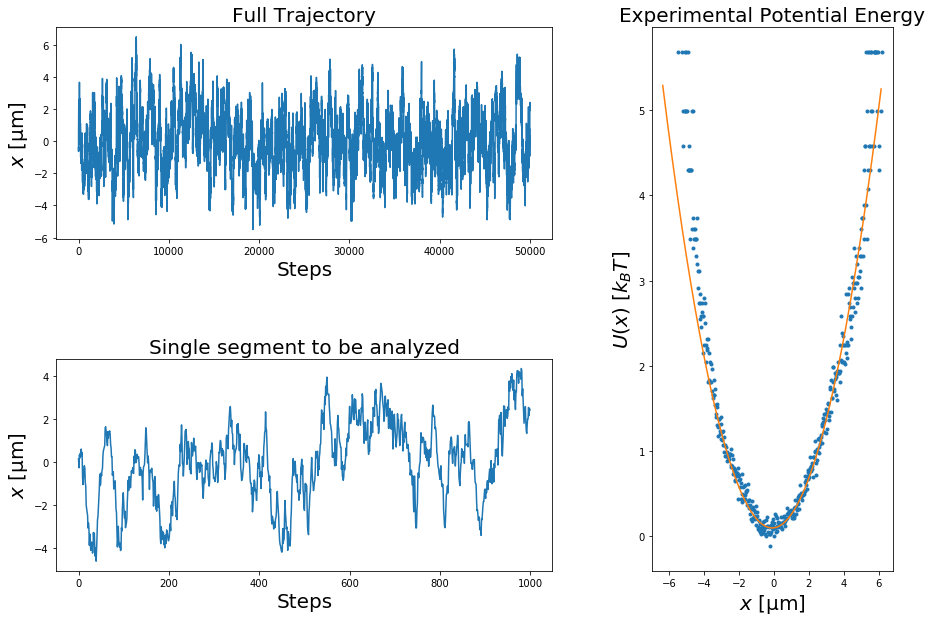

In [2]:
### Import the data 
### Example 1a 
import scipy.io as sci
data_name = 'Data_Example1b'
x = sci.loadmat(data_name)['x'].reshape(50000,)


### Visualize the trajectory

import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(10,10)
plt.subplot(gs[0:4,0:6])
plt.ylabel('$x$ [\u03BCm]',fontsize=20)
plt.xlabel('Steps',fontsize=20)
plt.title('Full Trajectory',fontsize=20)
plt.plot(x)

### Visualize a single input for analysis

plt.subplot(gs[6:10,0:6])
plt.ylabel('$x$ [\u03BCm]',fontsize=20)
plt.xlabel('Steps',fontsize=20)
plt.title('Single segment to be analyzed',fontsize=20)
plt.plot(x[23000:28000:5])

### Visualize the measured truths 

import numpy as np
l = (np.arange(500) - 250) * 0.025
h = np.histogram(x, bins = l)[0]
U = -np.log(h[h>0]) + np.log(h[round(h.size/2)]) 
plt.subplot(gs[:,7:10])
plt.xlabel('$x$ [\u03BCm]',fontsize=20)
plt.ylabel('$U(x)$ [$k_BT$]',fontsize=20)
plt.title('Experimental Potential Energy',fontsize=20)
plt.plot(l[np.append(h>0,False)],U,'.')
k = 1.1                                                           # Measured stiffness
from scipy.constants import Boltzmann as kB
plt.plot(l-.1,.5*k*1e-9*l**2*1e-12/kB/300 + .1)




In [4]:
### Analyze the data

from keras.models import load_model
import numpy as np
from scipy.constants import Boltzmann as kB
network = load_model('Network_Example_1a.h5')
predictions_k = []
oversamp = 1
nmeas = 400
steps = int((x.size-1000*oversamp)/nmeas)
slength = 1000*oversamp
for i in range(nmeas):
    x_crop = x[(i*steps):(i*steps+slength):oversamp]
    predicted_k = DeepCalib.predict(network, x_crop)[0]
    predictions_k.append(predicted_k)

k0 = 10
rescale_targets = lambda scaled_k: np.exp(scaled_k) * k0     # Inverse of targets_scaling    


Text(0, 0.5, 'Measured $k$ [fN/μm]')

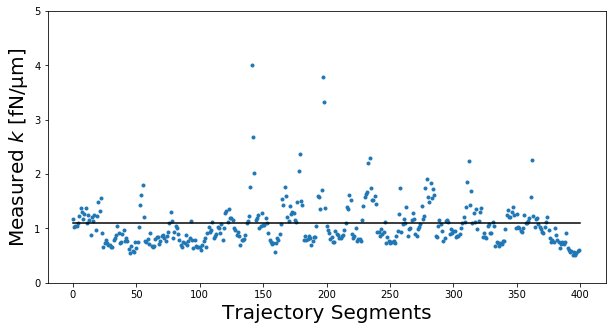

In [5]:
### Plot the results

fig = plt.figure(figsize=(10, 5))
plt.plot(rescale_targets(predictions_k),'.')
plt.plot([0, nmeas], np.array([k, k]),color='black')
plt.ylim([0, 5])
plt.xlabel('Trajectory Segments',fontsize=20)
plt.ylabel('Measured $k$ [fN/\u03BCm]',fontsize=20)